In [37]:
# Load the Catchment data
from Reader import load_catchments
catchments = load_catchments('catchments_data.pkl')

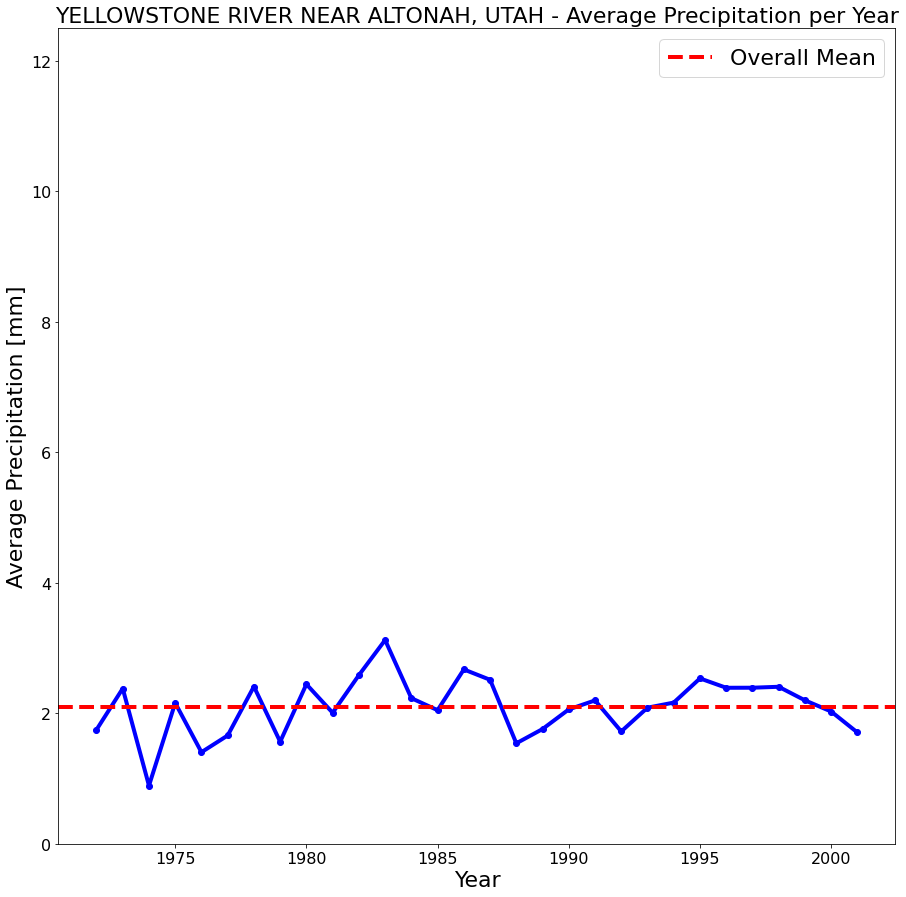

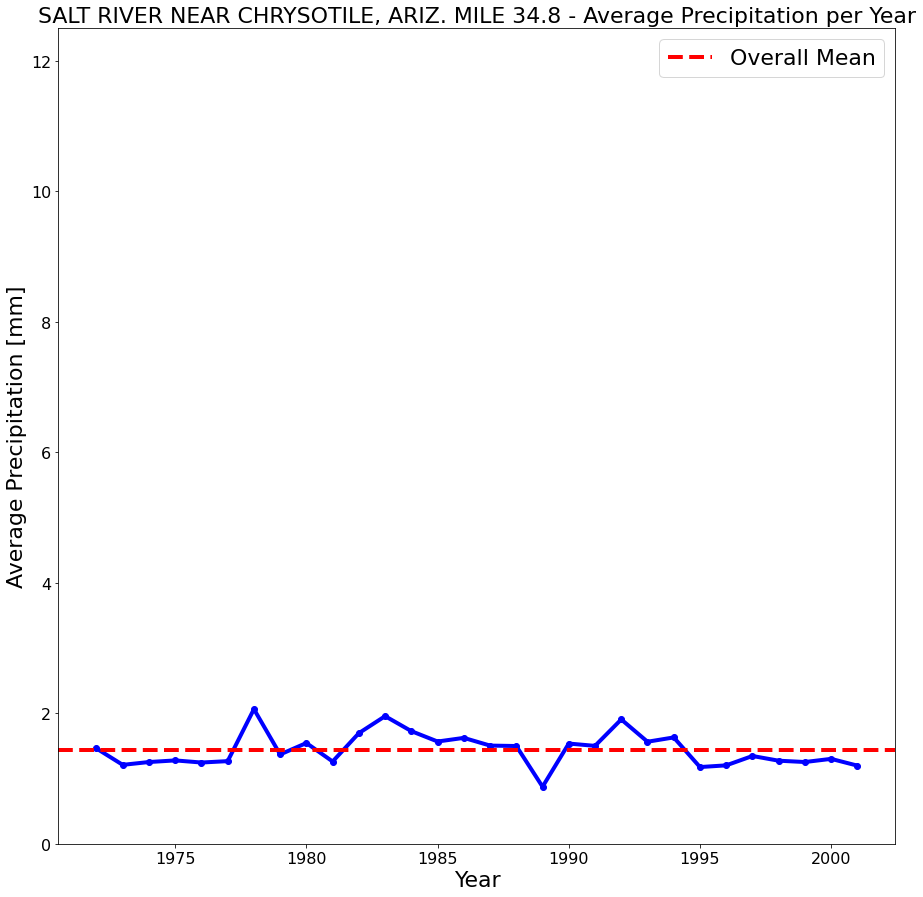

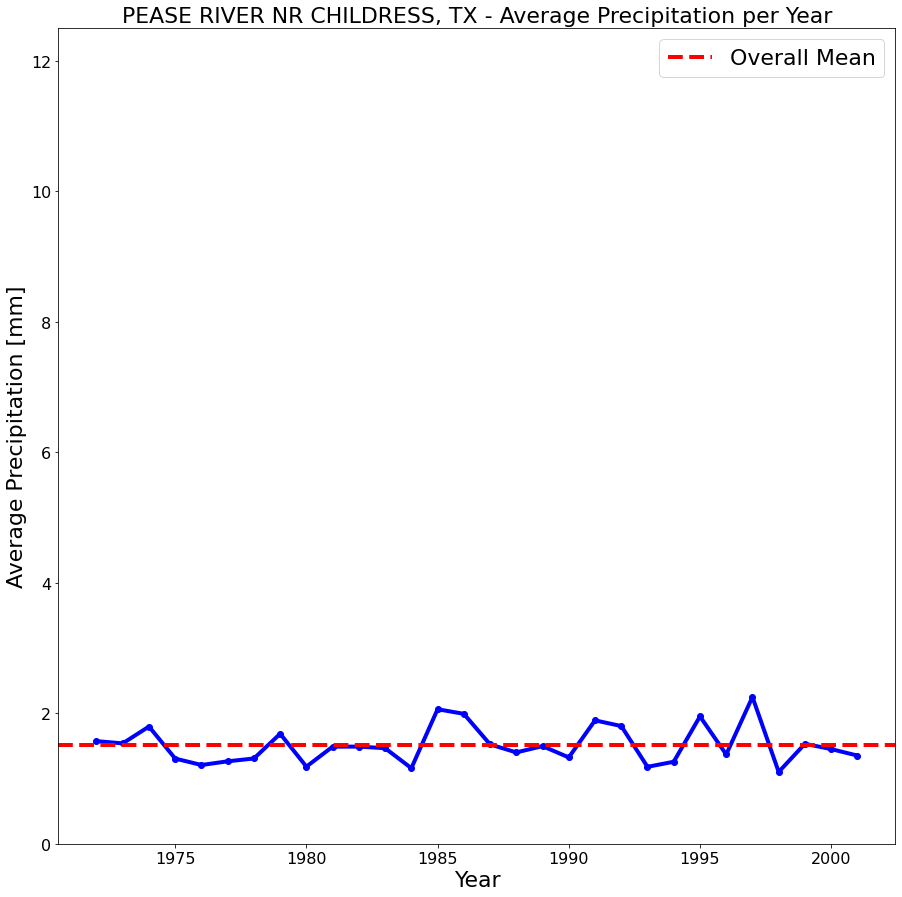

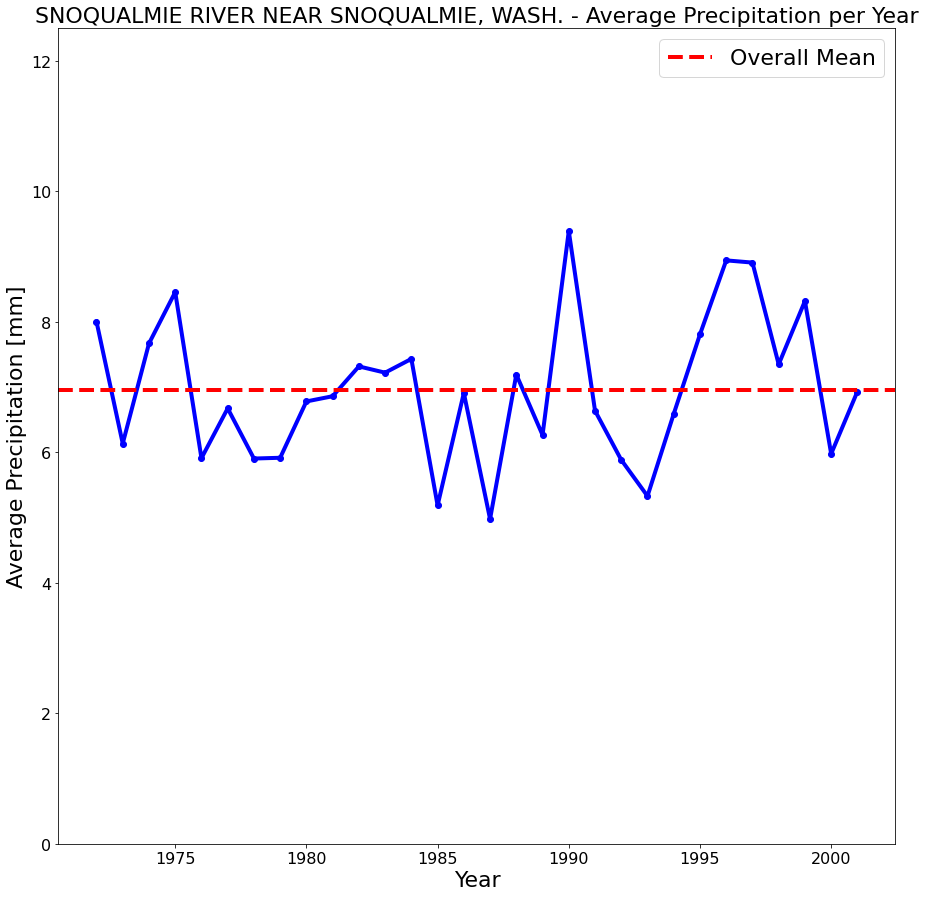

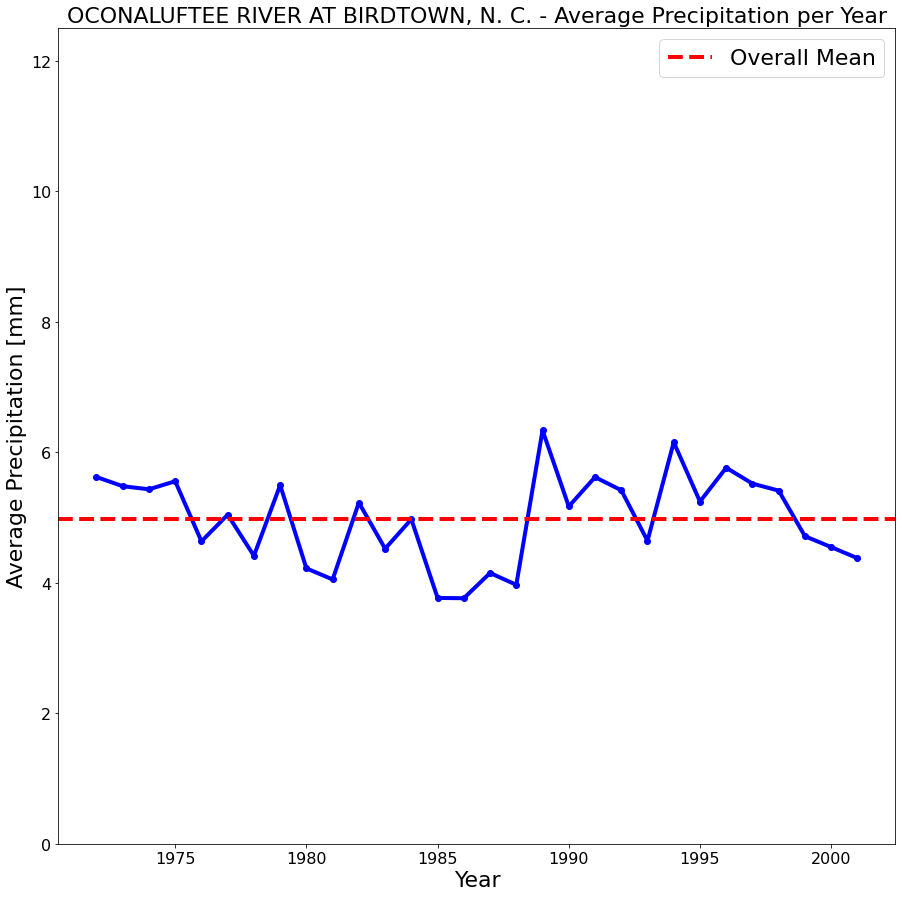

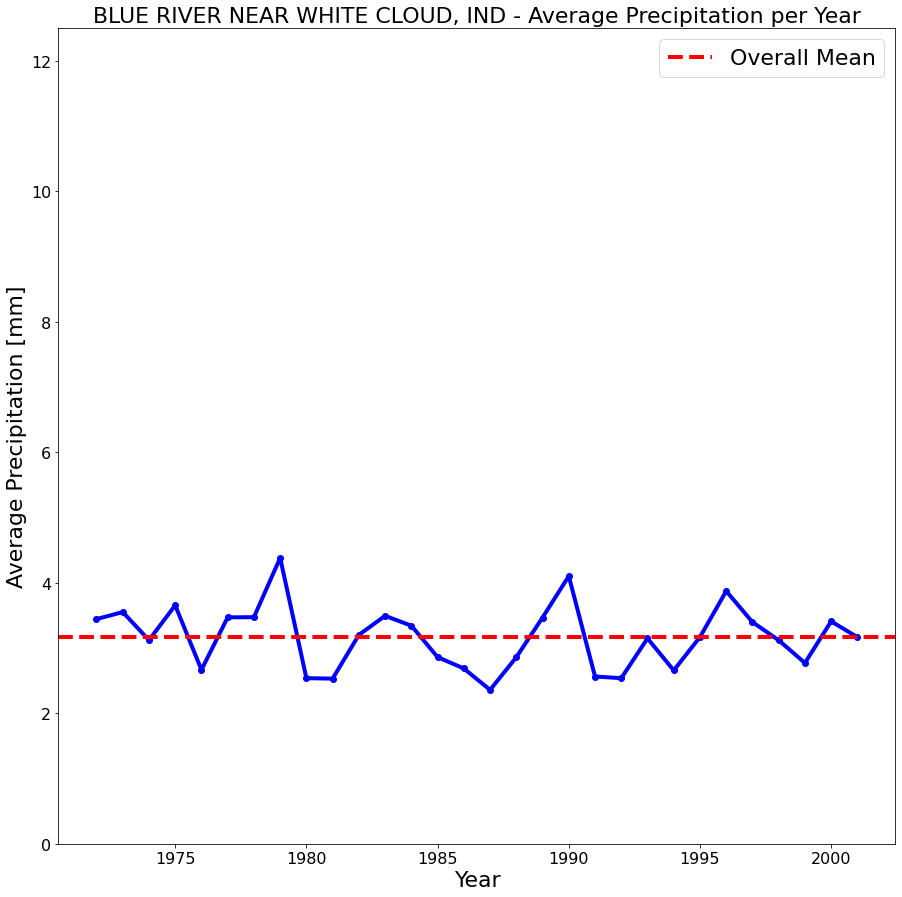

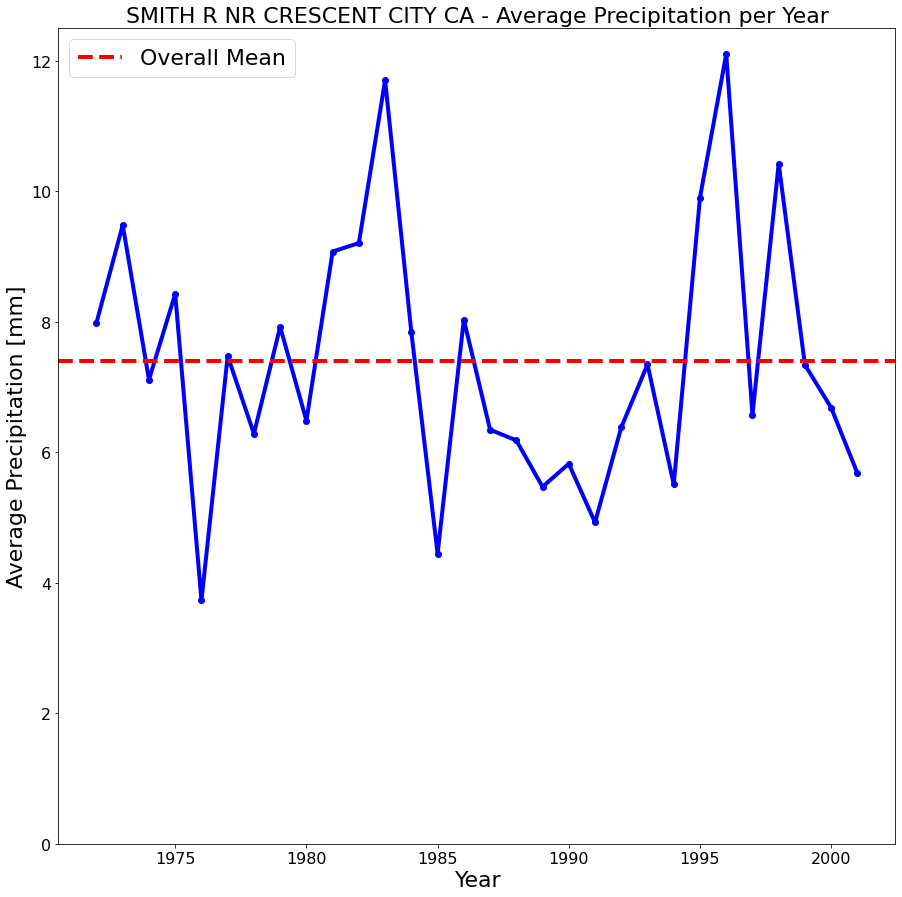

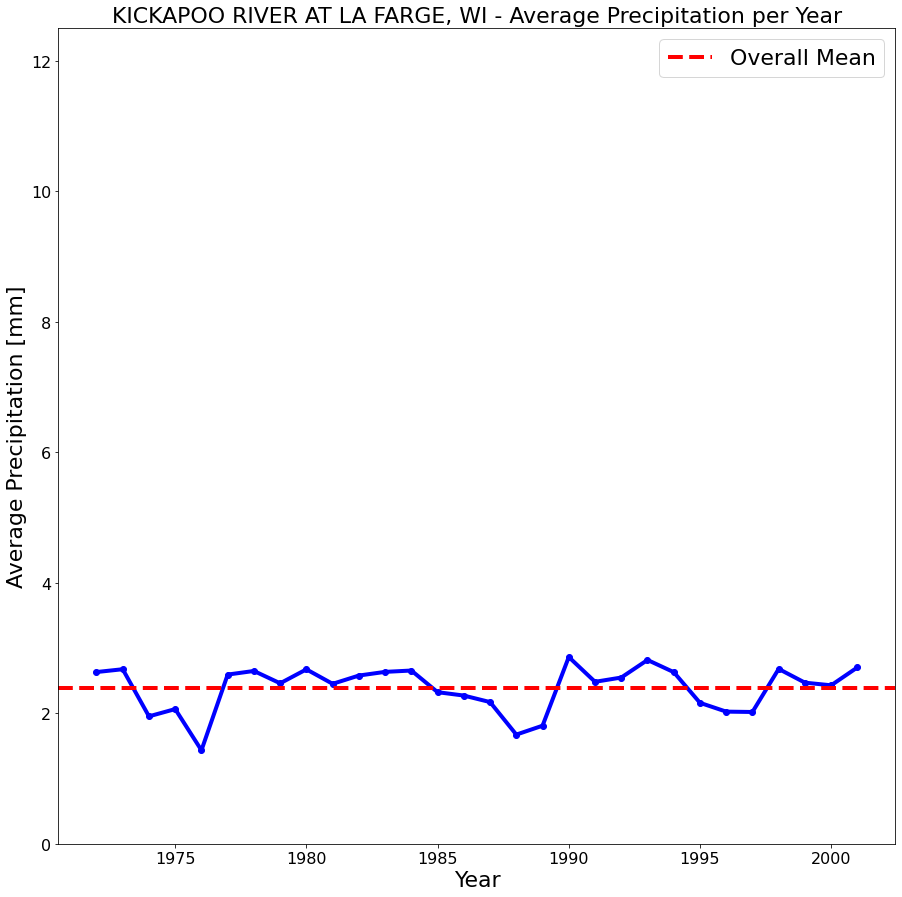

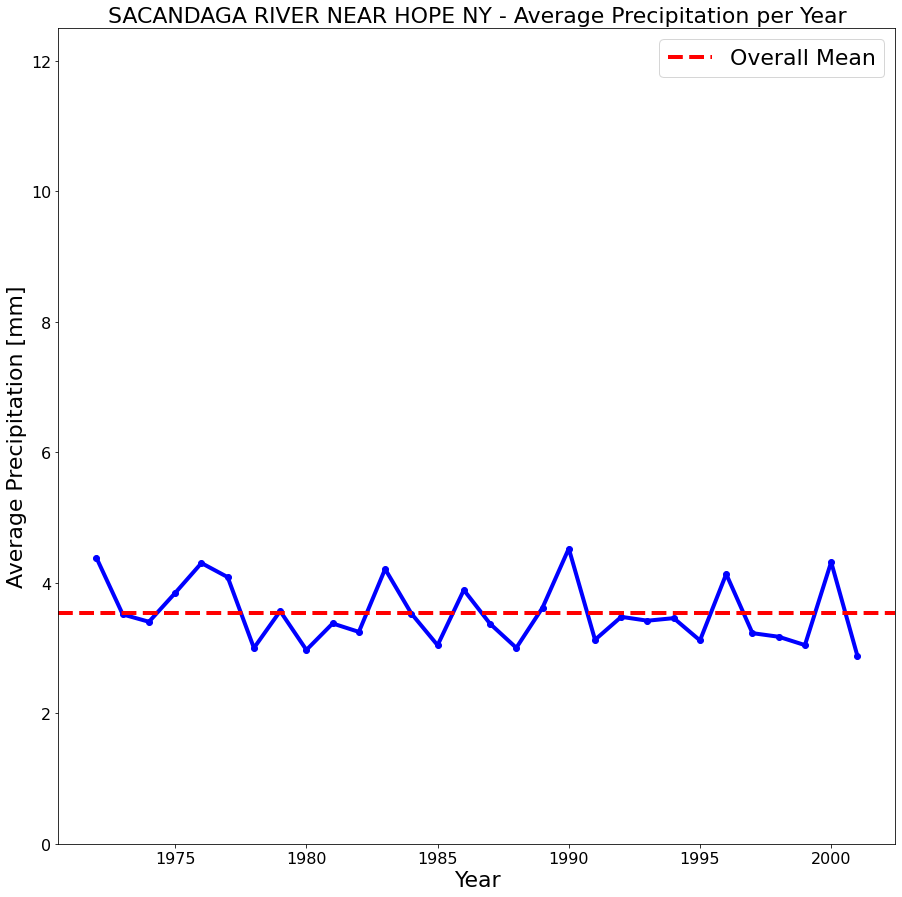

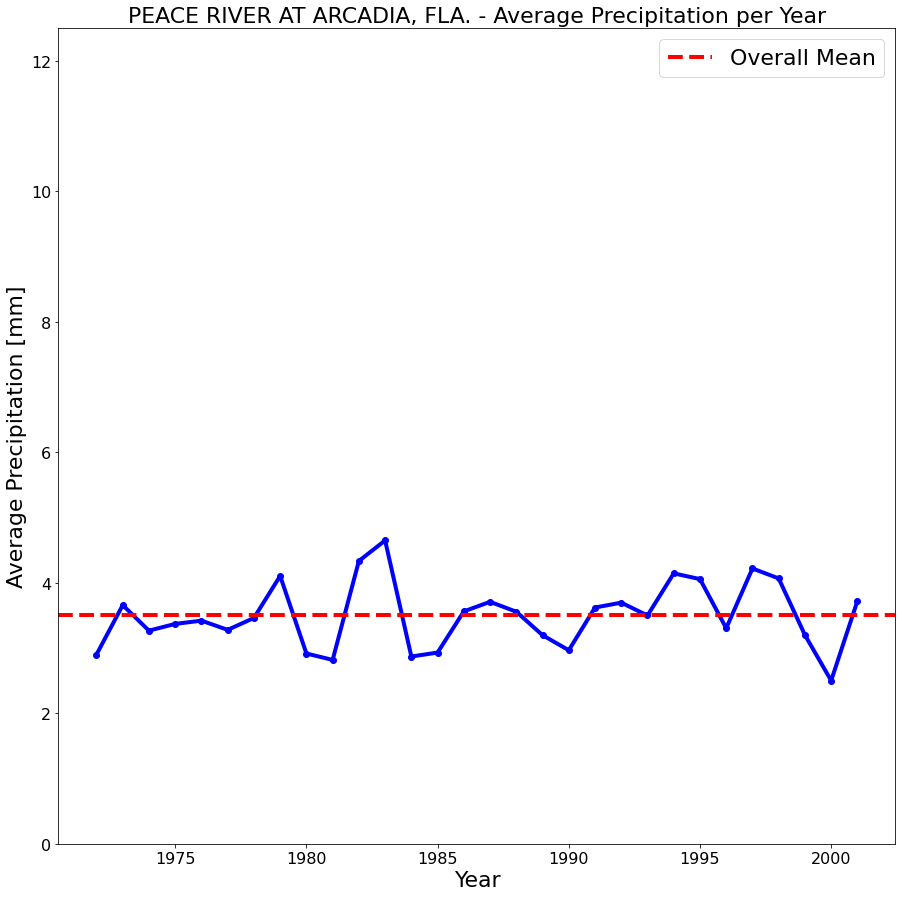

In [38]:
catchment_indexes = [0,1,10,11,12,13,14,16,23,24]
for ci in catchment_indexes:
    catchments[ci].plot_yearly_data(data_type='precipitation', average_over_all_years=True)  # Plotting precipitation 

sum= [2929.8300000000027]


<Figure size 1080x1080 with 0 Axes>

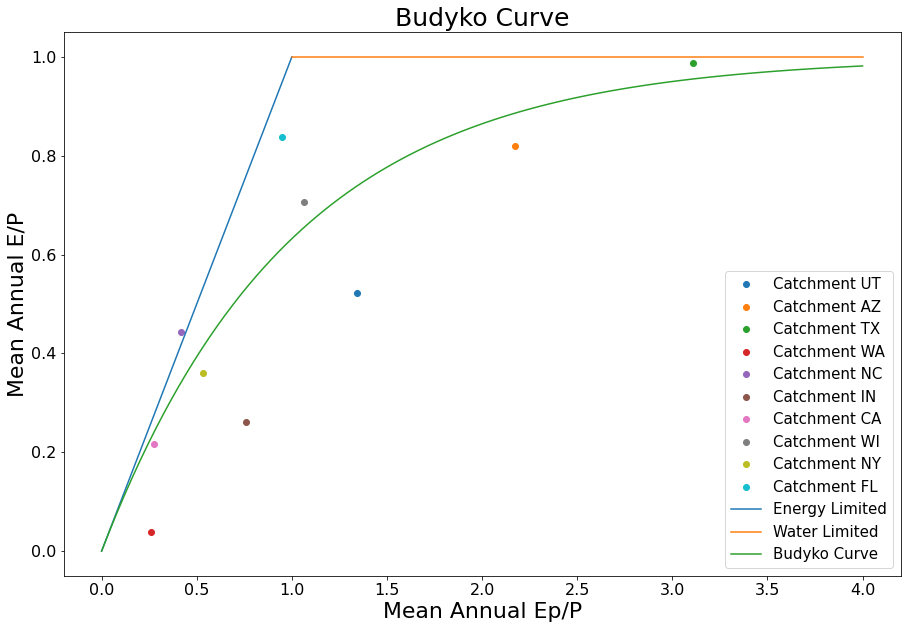

In [39]:
#for ci in catchment_indexes:
    #catchments[ci].plot_max_values_each_year('total_streamflow')  # Plotting the maximum precipitation value for each year

# catchment.plot_yearly_data(1990, 'potential_evaporation')  # Plotting potential evaporation for the year 1990

# catchment.plot_yearly_data(1990, 'total_streamflow')  # Plotting total streamflow for the year 1990

# catchment.plot_yearly_data(1990, 'fast_flow')  # Plotting fast flow for the year 1990

# catchment.plot_yearly_data(1990, 'slow_flow')  # Plotting slow flow for the year 1990

# catchment.plot_yearly_data(1990, 'combination')  # Plotting a combination of data for the year 1990

# catchment.plot_yearly_data(1990, 'precipitation', average_over_month=True)  # Plotting average precipitation per month for the year 1990

# catchment.plot_yearly_data(1990, 'precipitation', average_over_month=False)  # Plotting daily precipitation values for the year 1990

import matplotlib.pyplot as plt
catchment = catchments[11]
year = 1990
#Plotting for a specific year
data_values = []
sum_of_precip = []


for year in range(1972, 1973):
    daily_rain_sum = 0
    for water_day in catchment.water_data:
        if water_day.date.year == year:
            daily_rain_sum = daily_rain_sum + water_day.precipitation

    sum_of_precip.append(daily_rain_sum)

#plt.plot(range(1972, 2000),sum_of_precip)
print('sum=',sum_of_precip)


plt.figure(figsize=(15, 15)) 


#BUDYKO_CURVE
import numpy as np
plt.figure(figsize=(15, 10)) 
catchment_indexes = [0,1,10,11,12,13,14,16,23,24]
for ci in catchment_indexes: 
    catchment = catchments[ci] 
    Ep_yearly=[]
    Pp_yearly=[]
    E_yearly=[]  
    Qp_yearly=[]  
    for year in range(1972,2002):
        Ip=0
        Ep=0
        IEp=0
        Idis=0
        for water_day in catchment.water_data:
            if water_day.date.year==year:                
                Ip= Ip + water_day.precipitation
                IEp=IEp+water_day.potential_evaporation
                Idis=Idis+water_day.total_streamflow         
        Pp_yearly.append(Ip) 
        Ep_yearly.append(IEp)    
        Qp_yearly.append(Idis)  
        #print('Total_Pp=',Pp_yearly)
        #print('Total_Ep=',Ep_yearly)
        #print('Total_Qp=',Qp_yearly)
    
    Aver_Ep=np.mean(Ep_yearly)
    Aver_Pp=np.mean(Pp_yearly)
    Aver_Qp=np.mean(Qp_yearly)
    actual_evaporation=Aver_Pp-Aver_Qp
    if ci==0:
        cii='UT'
    if ci==1:
        cii='AZ'
    if ci==10:   
        cii='TX'    
    if ci==11:
       cii='WA'     
    if ci==12:
        cii='NC'
    if ci==13:
        cii='IN'
    if ci==14:
        cii='CA'
    if ci==16:
        cii='WI'
    if ci==23:
        cii='NY'
    if ci==24:
        cii='FL'
    plt.plot(Aver_Ep/Aver_Pp,actual_evaporation/Aver_Pp,'o',label='Catchment '+ str(cii))
   

fontsize=22   
x1=np.array([0,1])
t1=np.array([0,1])
x2=np.array([1,4])
t2=np.array([1,1])

x_curve=np.linspace(0,4,100)
plt.plot(x1,t1,label='Energy Limited')
plt.plot(x2,t2,label='Water Limited')
plt.plot(x_curve,1-np.exp(-x_curve),label='Budyko Curve')
plt.title('Budyko Curve', fontsize=25)
plt.xlabel('Mean Annual Ep/P', fontsize=fontsize)
plt.ylabel('Mean Annual E/P', fontsize=fontsize)
plt.legend(fontsize=15)
plt.show()
